<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo II: Aprendizaje No supervizado: Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.

> `Etiquetas` para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Casos de Uso de K-Means

Algunos casos de uso son:

> **Segmentación por Comportamiento:** relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.

> **Categorización de Inventario:** agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples = 1500, random_state = 5)


In [3]:
X

array([[-4.4207936 ,  7.90908652],
       [-5.6742539 ,  8.24798888],
       [ 0.15096735,  3.72731887],
       ...,
       [-6.15312156,  7.33253057],
       [-6.20649316,  7.96321396],
       [ 0.8546093 ,  1.95771111]])

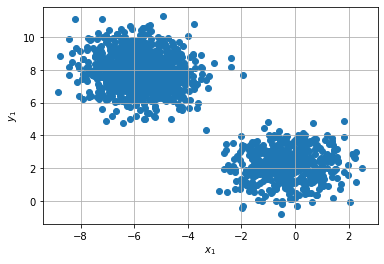

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.grid()
plt.show()

In [5]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [6]:
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters = 5, random_state = 5, init = 'random') # Instanciamos un obj de la clase KMeans donde le decimos como inicializar el algoritmo


In [7]:
#Entrenar al algoritmo mediante los datos de entrada (los datos que queremos clusterizar)
model.fit(X)

KMeans(init='random', n_clusters=5, random_state=5)

In [8]:
grupos = model.predict(X)
grupos

array([0, 3, 1, ..., 4, 4, 1])

In [9]:
len(X), len(grupos)

(1500, 1500)

In [10]:
centroides = model.cluster_centers_
centroides

array([[-4.79079314,  7.45480191],
       [ 0.41625349,  2.64822415],
       [-1.01621549,  1.75345623],
       [-5.94632684,  9.12049524],
       [-6.56758703,  7.25734045]])

In [11]:
X_df = pd.DataFrame(X, columns =['x_1', 'x_2'])
X_df['grupos_kmeans'] = grupos
X_df.head()

,x_1,x_2,grupos_kmeans
0,-4.420794,7.909087,0
1,-5.674254,8.247989,3
2,0.150967,3.727319,1
3,1.356002,2.735379,1
4,1.228192,2.439333,1


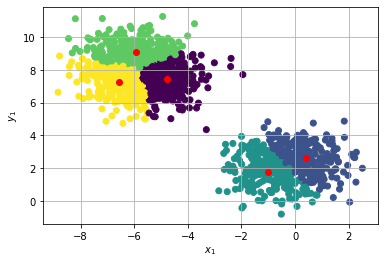

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c = grupos)
plt.plot(centroides[:,0],centroides[:,1], 'or')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.grid()
plt.show()

In [13]:
#%% Criterio de selección
model.inertia_

1648.3521287909502

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0, 0.5, 'Inercias')

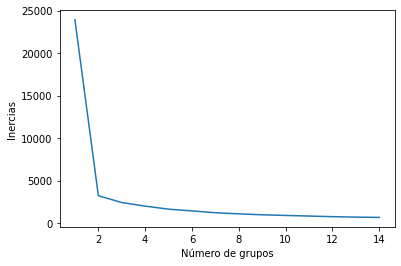

In [14]:
#Criterio del CODO
n_grupos = 15
inercias = np.zeros(n_grupos)

for k in np.arange(1,n_grupos):
    model = KMeans(n_clusters = k, random_state = 5, init = 'random')
    model = model.fit(X)
    inercias[k] = model.inertia_

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,n_grupos), inercias[1:])
plt.xlabel('Número de grupos')
plt.ylabel('Inercias')


Text(0, 0.5, 'Inercias')

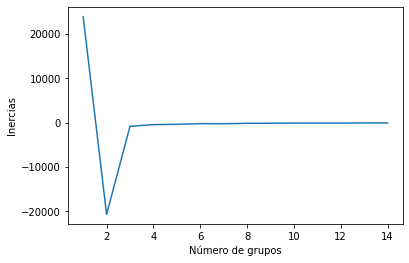

In [15]:
#Criterio del gradiente

grad = np.diff(inercias)
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,n_grupos), grad)
plt.xlabel('Número de grupos')
plt.ylabel('Inercias')

In [16]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos


### Fuunciones para los criterios de selección de grupos

In [17]:
def criterio_codo_kmeans(X, n_grupos):
    inercias = np.zeros(n_grupos)

    for k in np.arange(1,n_grupos):
        model = KMeans(n_clusters = k, random_state = 5, init = 'random')
        model = model.fit(X)
        inercias[k] = model.inertia_

    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,n_grupos), inercias[1:])
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercias')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


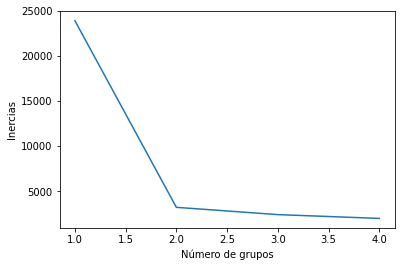

In [18]:
criterio_codo_kmeans(X, 5)

In [19]:
def criterio_grad_kmeans(X, n_grupos):
    inercias = np.zeros(n_grupos)

    for k in np.arange(1,n_grupos):
        model = KMeans(n_clusters = k, random_state = 5, init = 'random')
        model = model.fit(X)
        inercias[k] = model.inertia_
    
    grad = np.diff(inercias)
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,n_grupos), grad)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercias')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


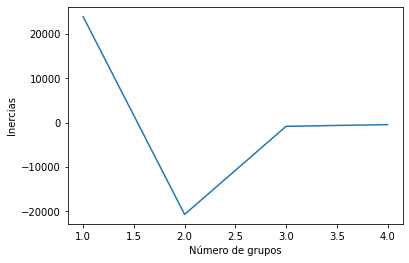

In [20]:
criterio_grad_kmeans(X, 5)

## Ejemplo 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pandas as pd

In [22]:
#%% Leer los datos
data_customer = pd.read_csv('../Data/shopping-data.csv')
data_customer.head()
#%% Estandarizar los datos


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data_filter = data_customer.iloc[:,2:]
data_filter

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [24]:
data_filter.values

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


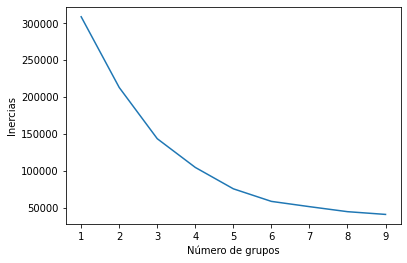

In [25]:
criterio_codo_kmeans(data_filter.values, 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


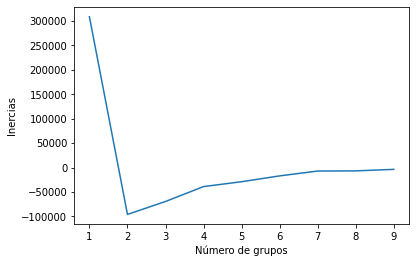

In [26]:
criterio_grad_kmeans(data_filter.values, 10)

In [27]:
model = KMeans(n_clusters = 4, random_state = 5, init = 'random')
model = model.fit(data_filter.values)
centroides = model.cluster_centers_
grupos = model.predict(data_filter.values)

In [28]:
grupos

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [29]:
data_filter['grupos_kmeans'] = grupos
data_filter

,Age,Annual Income (k$),Spending Score (1-100),grupos_kmeans
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [30]:
centroides

array([[24.82142857, 28.71428571, 74.25      ],
       [44.89473684, 48.70526316, 42.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895]])

In [31]:
data_filter[data_filter['grupos_kmeans'] == 3].head()

,Age,Annual Income (k$),Spending Score (1-100),grupos_kmeans
124,23,70,29,3
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
132,25,72,34,3


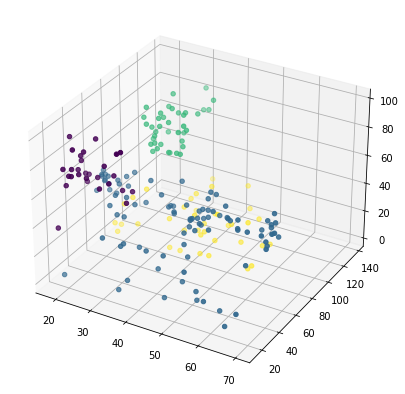

In [32]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = '3d')

ax.scatter3D(data_filter.iloc[:,0], data_filter.iloc[:,1], data_filter.iloc[:,2], c=data_filter.iloc[:,-1])

## Ejemplo 2

Tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.

Usted es el propietario del centro comercial y desea comprender a sus clientes. Desea saber quienes clientes pueden ser clientes objetivos para que el equipo de marketing planifique una campaña.

**¿Quiénes son sus clientes objetivo con los que puede iniciar la estrategia de marketing?**

Para responder la pregunta anterior necesitamos realizar lo siguiente:

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Conclusiones o comentarios acerca de los resultados

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from CDIN import CDIN as cd


In [34]:
#%% Leer los datos
data_customer.set_index('CustomerID', inplace =True)

In [35]:
data_customer['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
data_customer

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [37]:
data_customer['Genre_code'] = data_customer['Genre'].map({'Male':0, 'Female':1})
data_customer.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_code
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [38]:
data_customer_filter = data_customer.iloc[:,1:]
data_customer_filter

,Age,Annual Income (k$),Spending Score (1-100),Genre_code
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,1
4,23,16,77,1
5,31,17,40,1
...,...,...,...,...
196,35,120,79,1
197,45,126,28,1
198,32,126,74,0


In [39]:
#%% 1.- data quality report dqr


In [40]:
#%% 2.- Limpieza de datos

In [ ]:
#%% 3.- EDA
## 1er insight


In [ ]:

## 2do insight (rango de edades)


In [ ]:
#%% 4.- Aplicar el criterio de selección de grupos


In [ ]:
# Visualizando el criterio del codo, se observa que con 5 grupos
# se puede obtener una buena clasificación

In [ ]:
#%% 5.- Aplican kmeans con el num opt de grupos


In [ ]:
#%% 6.- Conclusiones o comentarios acerca de los resultados
# Visualizar todos los clusters


## Actividad 3

Agrupar usuarios Twitter de acuerdo a su personalidad con K-means.

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA (obtener al menos 3 insights)

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Graficar, concluir y comentar acerca de los resultados.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D


In [42]:
#Leer datos
data_twiter = pd.read_csv('../Data/twiter_analisis.csv')
data_twiter

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [43]:
data_twiter.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [44]:
# dqr del dataframe
from CDIN import CDIN as cdin
dqr_twiter = cdin.dqr(data_twiter)
dqr_twiter

,Nombres,Tipo_Dato,Datos_Faltantes,Valores_Presentes,Num_Valores_Unicos,Min,Max,Categorica
usuario,usuario,object,0,140,140,3gerardpique,xoellopez,True
op,op,float64,0,140,140,30.020465,71.696129,False
co,co,float64,0,140,140,7.852756,49.637863,False
ex,ex,float64,0,140,140,18.693542,59.824844,False
ag,ag,float64,0,140,140,9.305985,40.583162,False
ne,ne,float64,0,140,140,1.030213,23.978462,False
wordcount,wordcount,float64,0,140,140,5.0208,217.1832,False
categoria,categoria,int64,0,140,9,1,9,False


In [45]:
data_twiter['categoria'].unique()

array([7, 4, 2, 5, 3, 1, 8, 6, 9], dtype=int64)

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1-> Actor/actriz

2->Cantante

3->Modelo

4->Tv, series

5->Radio

6->Tecnología

7->Deportes

8->Politica

9->Escritor


In [46]:
# 3.- Analisis exploratorio de datos EDA (obtener al menos 3 insights)

In [47]:
#1er insight
data_twiter_cat = data_twiter.groupby('categoria').size()
data_twiter_cat

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

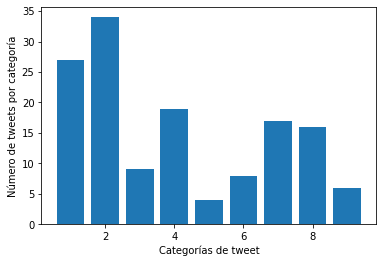

In [48]:
plt.figure(figsize=(6,4))
plt.bar(x=data_twiter_cat.index, height = data_twiter_cat.values )
plt.xlabel('Categorías de tweet')
plt.ylabel('Número de tweets por categoría')
plt.show()

In [49]:
data_twiter.corr()

,op,co,ex,ag,ne,wordcount,categoria
op,1.000000,0.204787,-0.508838,-0.662599,-0.238146,0.270123,-0.491178
co,0.204787,1.000000,-0.425614,-0.431095,0.180469,0.346416,0.061700
ex,-0.508838,-0.425614,1.000000,0.497006,-0.118141,-0.291869,0.160371
ag,-0.662599,-0.431095,0.497006,1.000000,0.003082,-0.381874,0.252489
ne,-0.238146,0.180469,-0.118141,0.003082,1.000000,0.134665,0.333581
wordcount,0.270123,0.346416,-0.291869,-0.381874,0.134665,1.000000,-0.097727
categoria,-0.491178,0.061700,0.160371,0.252489,0.333581,-0.097727,1.000000


In [50]:
import seaborn as sn

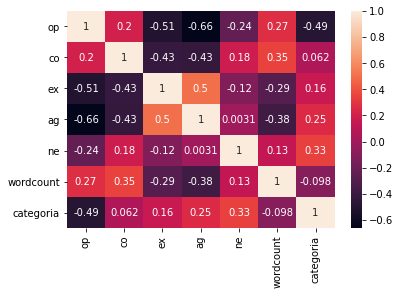

In [51]:
plt.figure(figsize=(6,4))
sn.heatmap(data_twiter.corr(), annot = True)
plt.show()

<Figure size 720x576 with 0 Axes>

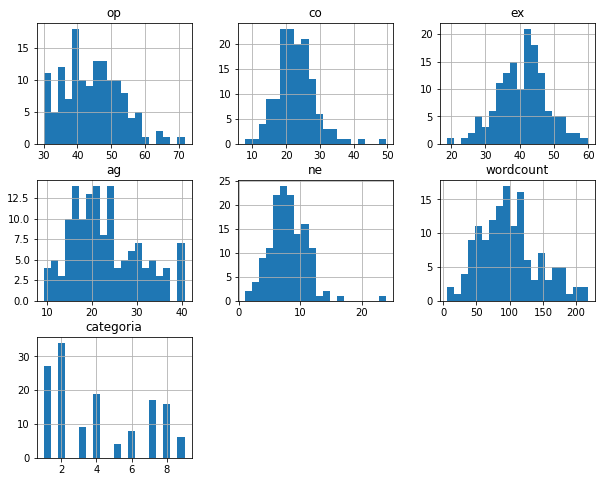

In [52]:
## Histogramas
plt.figure(figsize=(10,8))
data_twiter.hist(bins = 20, figsize=(10,8));
plt.show()

In [53]:
data_twiter.skew()

C:\Users\uie70742\AppData\Local\Temp/ipykernel_31412/2534424287.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_twiter.skew()


op           0.457404
co           0.889230
ex          -0.144861
ag           0.505098
ne           1.065133
wordcount    0.484674
categoria    0.444045
dtype: float64

Las variables que nos pueden servir para la agrupación pueden ser `["op","ex","ag"]`

In [54]:
# Crear la figura
data_twitter_filter = data_twiter[["op","ex","ag"]]
data_twitter_filter.head()


,op,ex,ag
0,34.297953,41.948819,29.370315
1,44.986842,37.938947,24.279098
2,41.733854,38.999896,34.645521
3,40.377154,52.337538,31.082154
4,36.664677,48.530806,31.138871


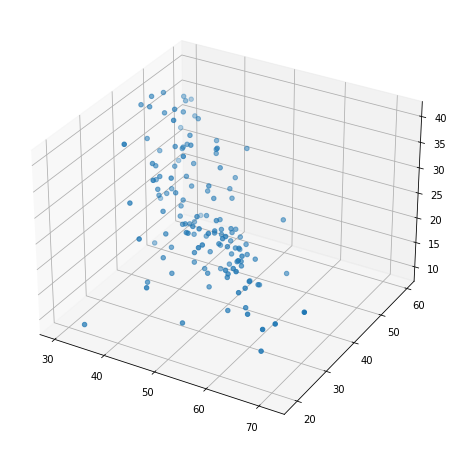

In [55]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(data_twitter_filter.iloc[:,0], data_twitter_filter.iloc[:,1], data_twitter_filter.iloc[:,2])

## Elección de los grupos óptimos

Vamos a hallar el valor de K mediante el criterio del codo


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


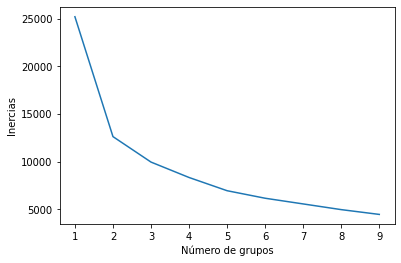

In [56]:
# Criterio del codo
criterio_codo_kmeans(data_twitter_filter, 10)
# plot de las inercias


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


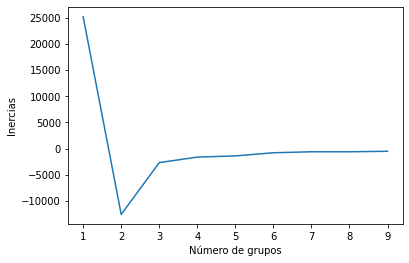

In [57]:
#Citerio del gradiente
criterio_grad_kmeans(data_twitter_filter, 10)

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

In [58]:
#Aplicar kmeans con el num opt de grupos
model = KMeans(n_clusters = 5, init='random')
model = model.fit(data_twitter_filter)
grupos = model.predict(data_twitter_filter)

In [61]:
len(grupos), data_twitter_filter.shape

(140, (140, 3))

In [62]:
data_twitter_filter['grupos_kmeans'] = grupos

C:\Users\uie70742\AppData\Local\Temp/ipykernel_31412/16467498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_twitter_filter['grupos_kmeans'] = grupos


In [63]:
data_twitter_filter.head()

,op,ex,ag,grupos_kmeans
0,34.297953,41.948819,29.370315,4
1,44.986842,37.938947,24.279098,3
2,41.733854,38.999896,34.645521,4
3,40.377154,52.337538,31.082154,0
4,36.664677,48.530806,31.138871,0


In [67]:
centroides = model.cluster_centers_
centroides

array([[35.33842993, 49.22755581, 33.9381323 ],
       [57.92200861, 31.5039735 , 15.67199517],
       [49.79263472, 41.26523115, 17.61041226],
       [42.52295478, 33.86133526, 20.06711865],
       [39.43540145, 43.11059564, 26.11571576]])

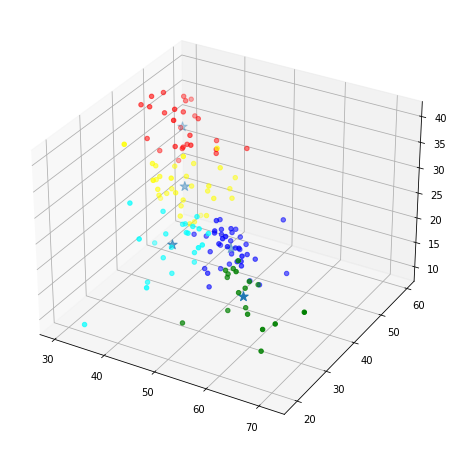

In [69]:
colors = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = []
for r in grupos:
    asignar.append(colors[r])

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(data_twitter_filter.iloc[:,0], data_twitter_filter.iloc[:,1], data_twitter_filter.iloc[:,2], c=asignar)
ax.scatter(centroides[:,0], centroides[:,1], centroides[:,2], marker = '*', s=100)

### Clasificar nuevas muestras


 podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. 

In [70]:
## Obtener el grupo de una nueva muestra
x_new = np.array([[45.95,57.74,15.66],
                  [20.0,14.5,80.3]])


In [71]:
model.predict(x_new)

array([2, 0])

# Ejemplo 4

In [ ]:
## Importatr digitos

In [ ]:
# Cluster por Kmeans